In [355]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import rand_score
import matplotlib.cm as cm
%matplotlib inline

# 1. Problem description
        Customer segmentation (also known as market segmentation) is a marketing technique that groups customers into groups. Grouping can be based on geography, demographics, consumer psychology, behavior, and other characteristics. The key to effectively segmenting customers is to group them based on a prediction of their value. Then use a different strategy for each group of customers to get the most value from high- and low-margin customers.
        In this project, I'll use a credit card usage data about 9,000 active card holders during 6 months to cluster these customers using unsupervised learning approaches, including PCA, Kmeans, and Hierarchical clustering. The results will uncover the underlying relations among customers, which will enable the bank to promote customized products to card users, hence increasing revenues of the company as well as customer experiences.
#### Data summary
 The data was dowloaded from https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?datasetId=14701. \
It summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following are the descriptions of different attributes :

`CUSTID`  : Identification of Credit Card holder (Categorical) \
`BALANCE` : Balance amount left in their account to make purchases \
`BALANCEFREQUENCY` : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)\
`PURCHASES` : Amount of purchases made from account \
`ONEOFFPURCHASES` : Maximum purchase amount done in one-go \
`INSTALLMENTSPURCHASES` : Amount of purchase done in installment \
`CASHADVANCE` : Cash in advance given by the user \
`PURCHASESFREQUENCY` : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) \
`ONEOFFPURCHASESFREQUENCY` : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) \
`PURCHASESINSTALLMENTSFREQUENCY` : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) \
`CASHADVANCEFREQUENCY` : How frequently the cash in advance being paid \
`CASHADVANCETRX` : Number of Transactions made with "Cash in Advanced" \
`PURCHASESTRX` : Numbe of purchase transactions made \
`CREDITLIMIT` : Limit of Credit Card for user \
`PAYMENTS` : Amount of Payment done by user \
`MINIMUM_PAYMENTS` : Minimum amount of payments made by user \
`PRCFULLPAYMENT` : Percent of full payment paid by user \
`TENURE` : Tenure of credit card service for user

# 2. Exploratory data analysis

## 2.1 Data cleaning

In [356]:
##loading data
data = pd.read_csv('credit_data.csv')
print(data.shape)
data.head()

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [357]:
#summary data
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [358]:
#check NA
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### There are two attributes that have NA's.

In [359]:
##imputing by median
data['IMPUTED'] = 0
data.loc[data['MINIMUM_PAYMENTS'].isnull(),'IMPUTED'] = 1
data.loc[data['MINIMUM_PAYMENTS'].isnull(),'MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].median()
data.loc[data['CREDIT_LIMIT'].isnull(),'CREDIT_LIMIT'] = data['CREDIT_LIMIT'].median()

In [360]:
data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
IMPUTED                             False
dtype: bool

#### Imputed the NA's with median values of that attributes. Because `MINIMUM_PAYMENTS` has a relatively large number of missing values, in order to keep track of the effect of imputation, another attribute called `IMPUTED` is added, where 1 means imputed and 0 means not imputed.

In [361]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,IMPUTED
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,1
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


## 2.2 Data visualization

#### a. Distributions of different attributes
The distributions of 16 attributes are plotted above. We can see that most of the distributions are heavily skewed towards one side. There are two exceptions, `PURCHASES_INSTALLMENTS_FREQUENCY` and `PURCHASES_FREQUENCY`, they have large densities on both ends.

In [362]:
## plot the distributions of the following attributes
print(data.columns[1:-2])

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')


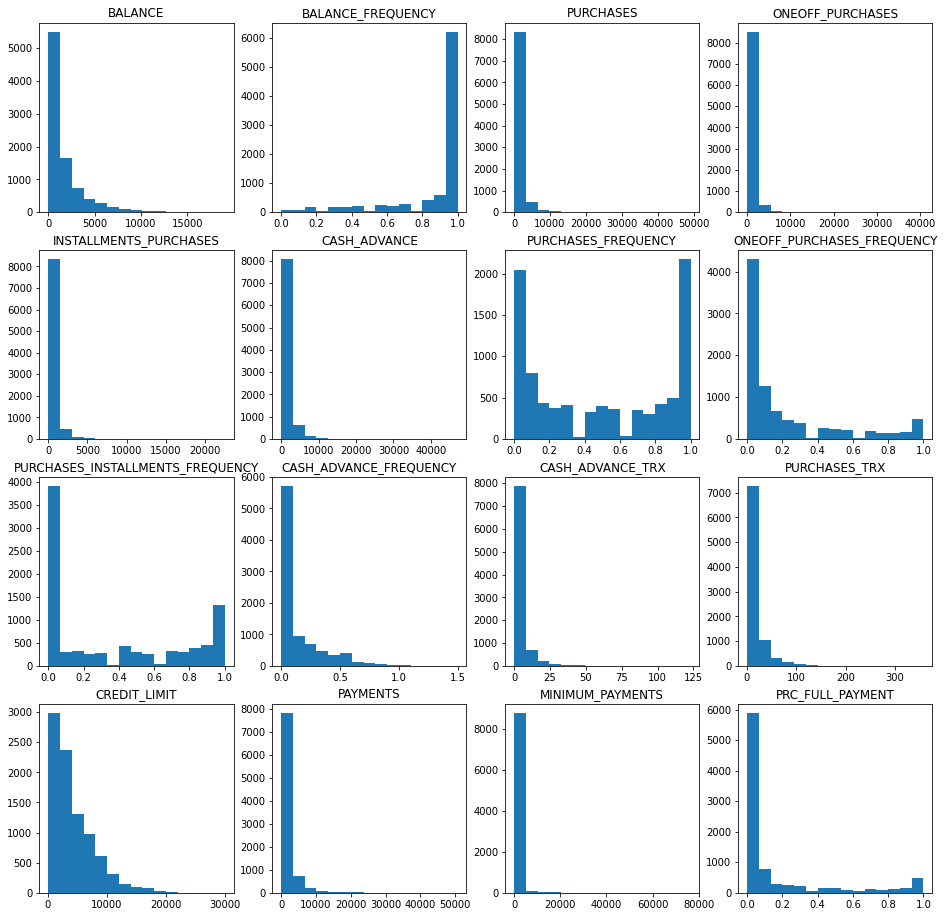

In [363]:
fig, ax = plt.subplots(4,4,figsize=(16,16))
attrs = data.columns[1:-2]
for i in range(4):
    for j in range(4):
        ax[i,j].hist(data[attrs[4*i+j]],bins=15)
        ax[i,j].set_title(attrs[4*i+j])

#### b. Correlation between different attributes

The correlations between different attributes are plotted below. As shown in in the figure, there some highly correlated attributes near the diagonal. `PURCHASES` is correlated with `ONEOFF_PURCHASES` and `INSTALLMENTS_PURCHASES`, which is not surprising because the total amount of purchases made from account should be related to the maximum amount in a single purchase and the amount of purchase done in installment. Similar correlations can also be oberved in `PURCHASES_FREQUENCY` and `PURCHASES_INSTALLMENTS_FREQUENCY` as well as `CASH_ADVANCE_FREQUENCY` and `CASH_ADVANCE_TRX`. Meanwhile, we can see that whether the data point is imputed or not is not correlated with other attributes as shown in the figure.

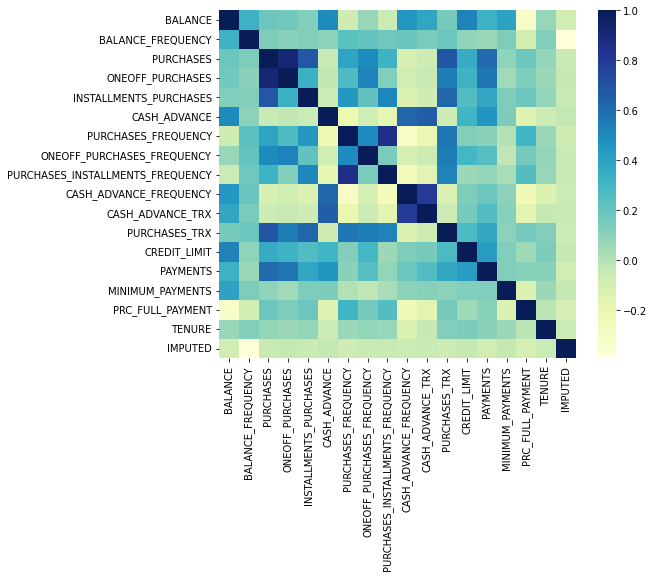

In [365]:
plt.figure(figsize=(8,6.4))
sns.heatmap(data[data.columns[1:]].corr(),cmap='YlGnBu');

# 3. Modeling

### a. normalization

In [366]:
## X is the original data
X = data[data.columns[1:-1]]
scaler = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

In [367]:
## X_imp is the original data with one extra attribute `IMPUTED`
imputed_points = data['IMPUTED'].to_numpy().reshape(X.shape[0],1)
X_imp = np.hstack((X,imputed_points))
X_imp.shape

(8950, 18)

### b. PCA on a similarity matrix for visualization

To better visualize the data at lower dimension and to visually evaluate the clustering performance, a cosine similarity matrix is calculated, which has the shape of $(8950, 8950)$. The matrix is then reduced using PCA to visualize at a 2D plane, which has the shape of $(8950, 2)$.

In [368]:
X_sim = cosine_similarity(X)
pca = PCA(n_components=2)
X_sim_reduced = pca.fit_transform(X_sim)
print(X_sim.shape)
print(X_sim_reduced.shape)

(8950, 8950)
(8950, 2)


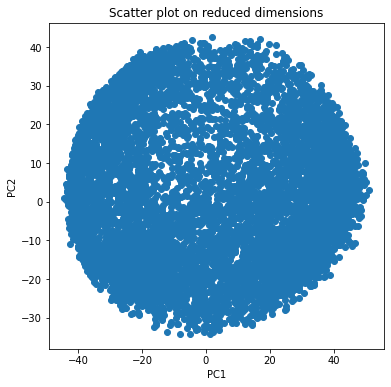

In [369]:
plt.figure(figsize=(6,6))
plt.scatter(X_sim_reduced[:,0],X_sim_reduced[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot on reduced dimensions');

### c. Kmeans: optimizing the number of clusters using inertia

To chose the appropriate number of clusters, the 'elbow' curves are plotted below. Two set of experiments are done with `X` and `X_imp` respectively to check whether the extra attribute influences the performance. The figure are shown below. We can see that those two curves are almost identical and the 'elbow' feature is not very typical, instead the transition is relatively smooth. So a range of possible numbers of clusters are proposed, including 3,4,5,6,7,8.

In [378]:
n_clusters=25
inertia=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    inertia.append(kmean.inertia_)  
inertia_2=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X_imp)
    inertia_2.append(kmean.inertia_)  

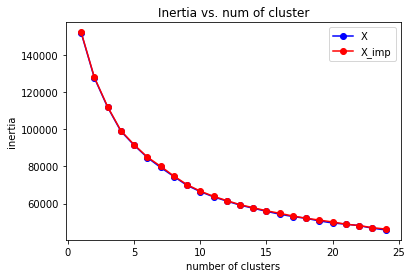

In [379]:
plt.plot(range(1,n_clusters),inertia, 'b-o',label='X')
plt.plot(range(1,n_clusters),inertia_2, 'r-o',label='X_imp')
plt.title('Inertia vs. num of cluster')
plt.xlabel('number of clusters')
plt.legend()
plt.ylabel('inertia');

### d. Selecting the number of clusters with silhouette analysis on KMeans clustering

Since we can't selet the most appropriate number of clusters from the elbow curve, a differnt method is used. Silhouette analysis is a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster compared to other clusters. The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters. 

From the figure, we can see that 3 has the highest silhouette score and the clustering is also reasonable in the 2d map.

Code Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.20953449220251932
For n_clusters = 3 The average silhouette_score is : 0.2505994020020264
For n_clusters = 4 The average silhouette_score is : 0.1976911456779212
For n_clusters = 5 The average silhouette_score is : 0.19099575815536024
For n_clusters = 6 The average silhouette_score is : 0.20284191455872777
For n_clusters = 7 The average silhouette_score is : 0.21517913074628572
For n_clusters = 8 The average silhouette_score is : 0.22178815645926073


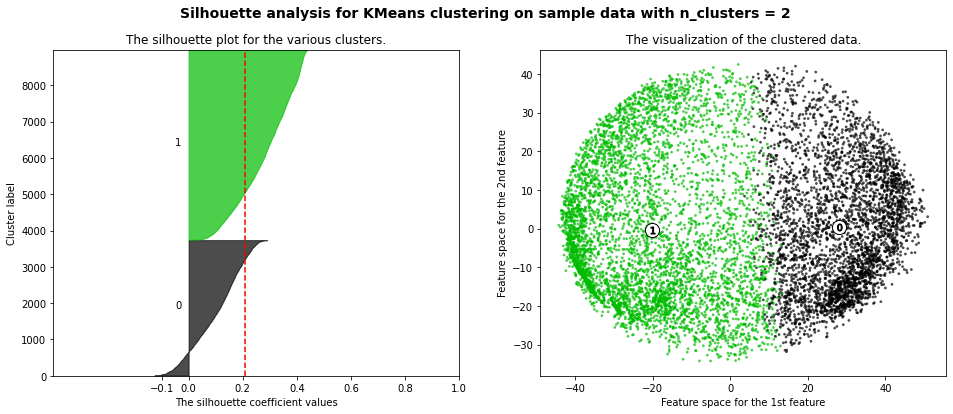

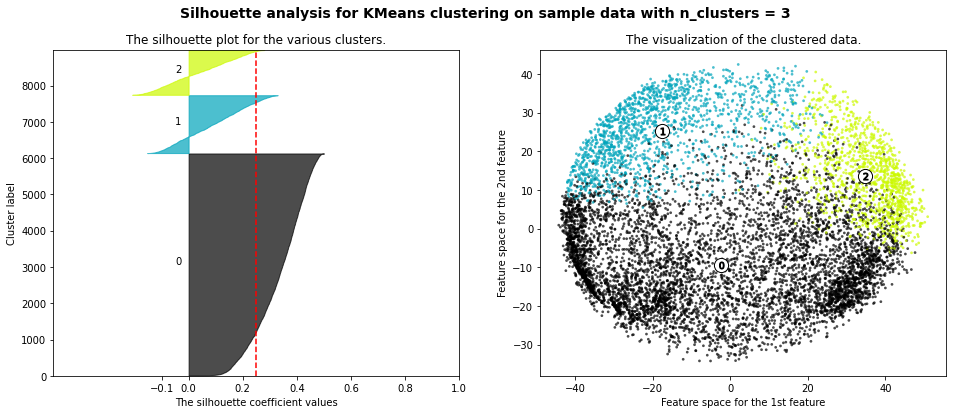

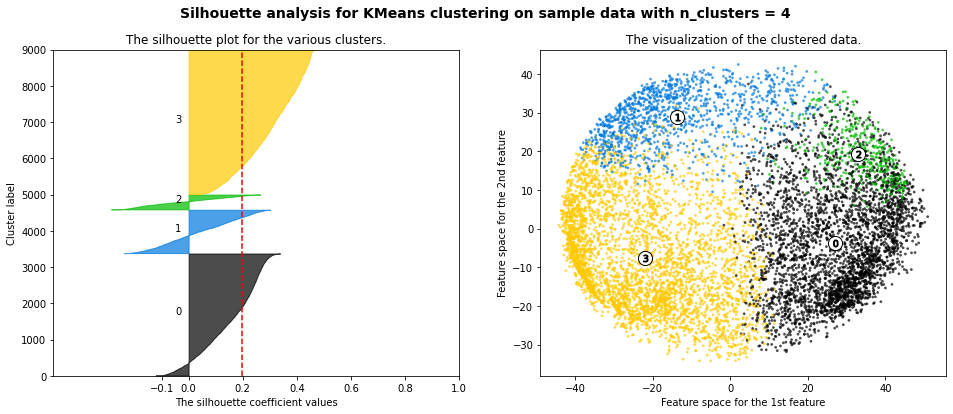

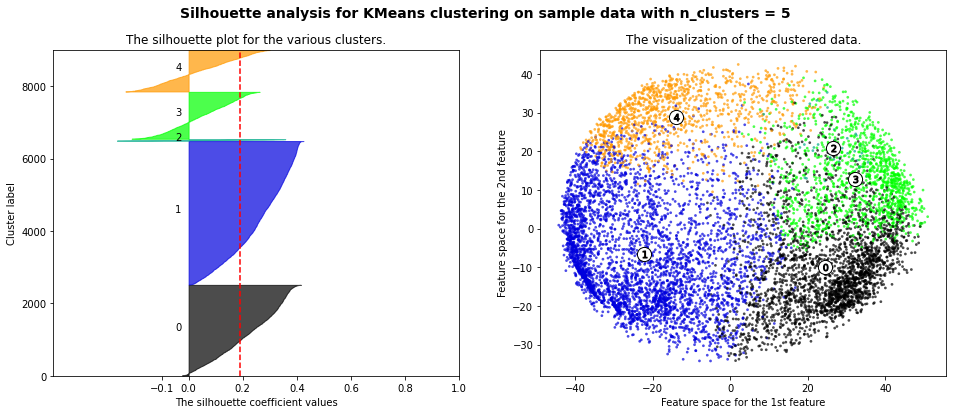

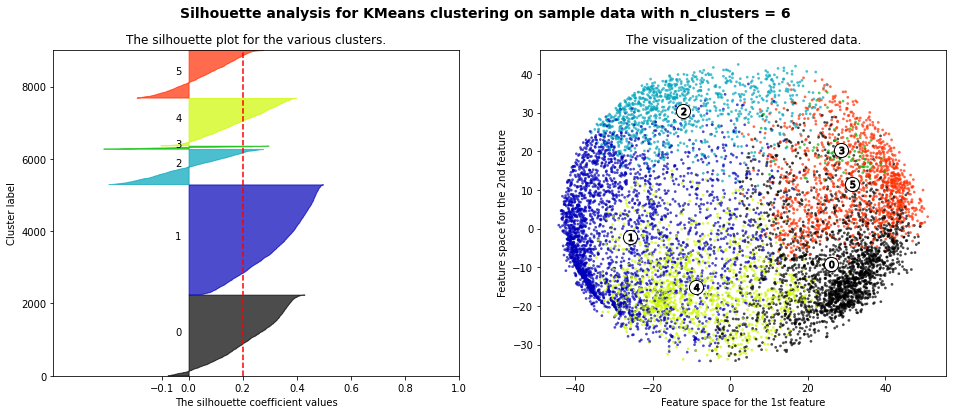

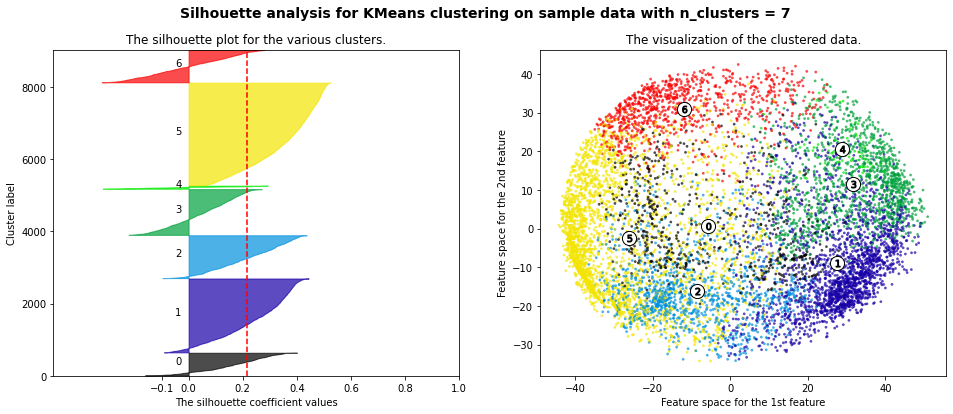

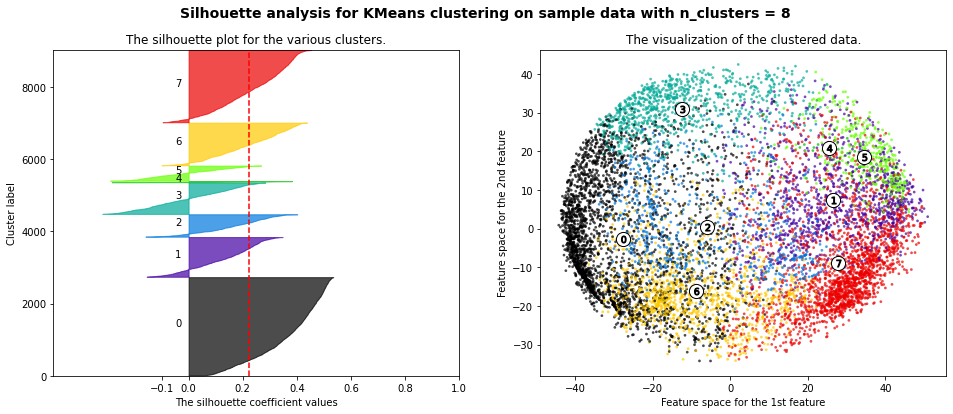

In [372]:
range_n_clusters = [2,3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 6)
    ax1.set_xlim([-0.5, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_sim_reduced[:, 0], X_sim_reduced[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    centers = np.array([X_sim_reduced[cluster_labels==i].mean(axis=0) for i in range(n_clusters)])
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### e. Comparison with Hierarchical clustering
To check whether this clustering result is robust, I used a different clustering technique. The linkage and affinity for hierarchical clustering are 'ward' and 'euclidean' (other combinations also tried, this gives the best performance). I calculated the silhouette score and the rand score. The silhouette score is lower than the K-means clustering. The rand score is around 67%, suggesting that nearly 2/3 of the data are clustered into the same group in two mothods, indicating the result is pretty robust

In [373]:
n_clusters = 3
kmeans_labels = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X)
hier_labels = AgglomerativeClustering(n_clusters=n_clusters,linkage='ward',affinity='euclidean').fit_predict(X)
silhouette_avg = silhouette_score(X, hier_labels) 
rand = rand_score(labels,kmeans_labels)

print('The average silhouette score of hierarchical clustering is {}.'.format(silhouette_avg)) 
print('The rand score between two methods is: {}.'.format(rand))

The average silhouette score of hierarchical clustering is 0.1674469835551831.
The rand score between two methods is: 0.6756981304986481.


Text(0.5, 0, 'pc2')

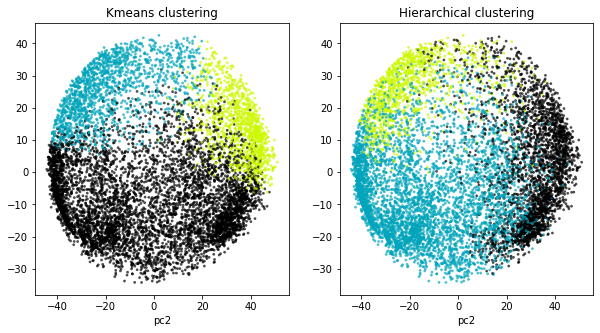

In [374]:
centers_kmeans = np.array([X_sim_reduced[kmeans_labels==i].mean(axis=0) for i in range(3)])
centers_hier = np.array([X_sim_reduced[hier_labels==i].mean(axis=0) for i in range(3)])
colors_kmeans = cm.nipy_spectral(kmeans_labels.astype(float) / 3)
colors_hier = cm.nipy_spectral(hier_labels.astype(float) / 3)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
ax1.scatter(X_sim_reduced[:, 0], X_sim_reduced[:, 1], marker=".",
            s=30, lw=0, alpha=0.7, c=colors_kmeans, edgecolor="k")
ax1.set_xlabel('pc1')
ax1.set_xlabel('pc2')
ax1.set_title('Kmeans clustering')
ax2.scatter(X_sim_reduced[:, 0], X_sim_reduced[:, 1], marker=".",
            s=30, lw=0, alpha=0.7, c=colors_hier, edgecolor="k")
ax2.set_title('Hierarchical clustering')
ax2.set_xlabel('pc1')
ax2.set_xlabel('pc2')

# 3. Results and discussion

In this project, I used Kmeans to do comstomer segmention and clustered them into three groups. The most distinct attributes among groups are: `PURCHASES_FREQUENCY`, `ONEOFF_PURCHASES_FREQUENCY`, `PURCHASES_INSTALLMENTS_FREQUENCY`, and `PRC_FULL_PAYMENT`.


In [375]:
c1 = data[kmeans_labels==0]
c2 = data[kmeans_labels==1]
c3 = data[kmeans_labels==2]
print('Cluster 1 has {} points.'.format(len(c1)))
print('Cluster 2 has {} points.'.format(len(c2)))
print('Cluster 3 has {} points.'.format(len(c3)))

Cluster 1 has 6119 points.
Cluster 2 has 1596 points.
Cluster 3 has 1235 points.


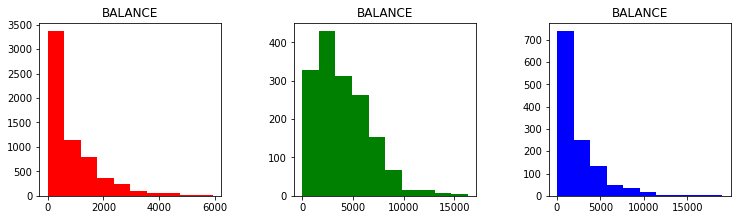

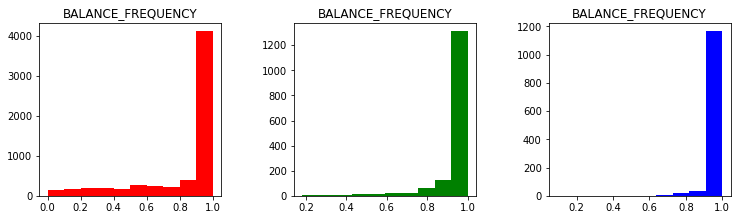

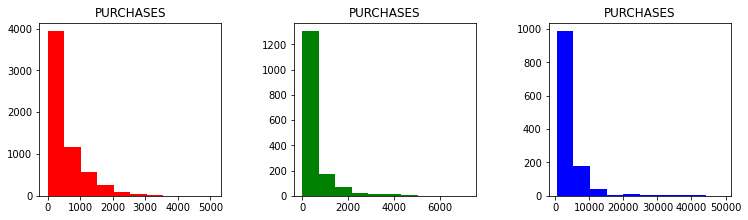

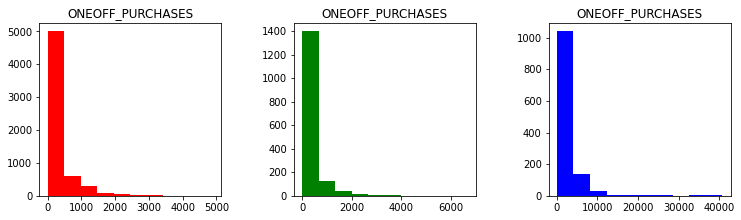

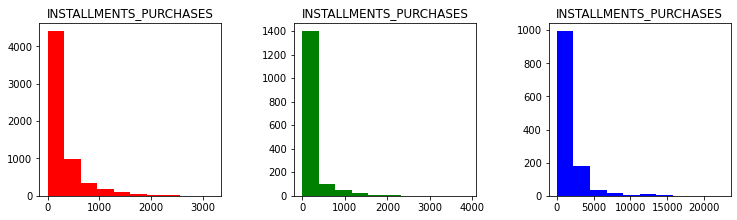

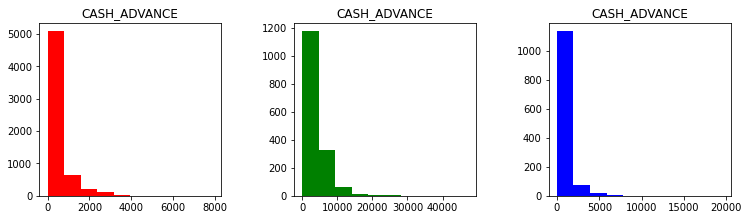

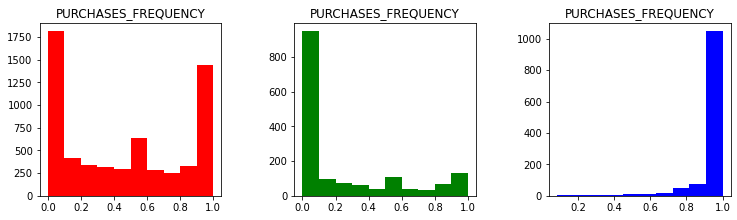

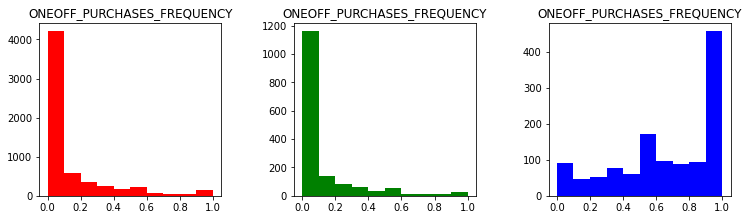

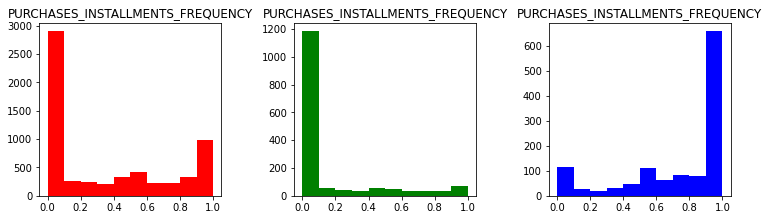

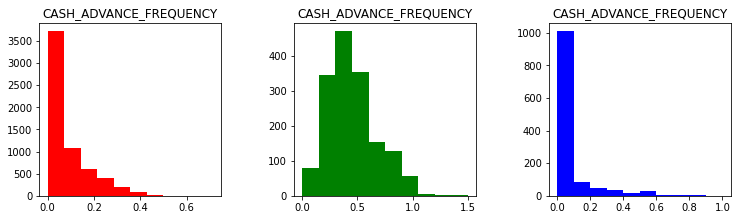

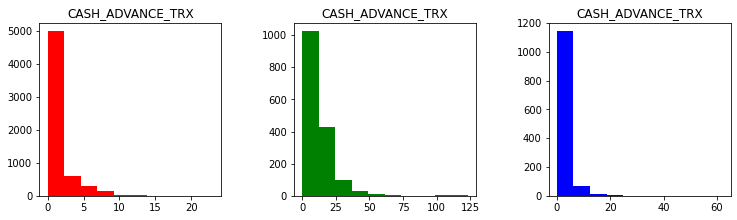

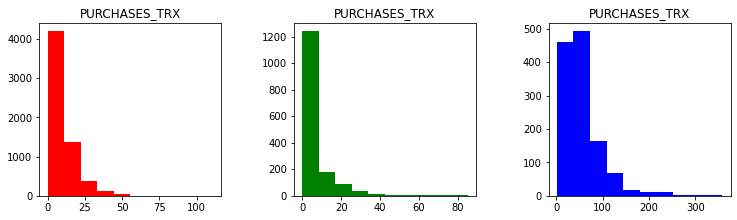

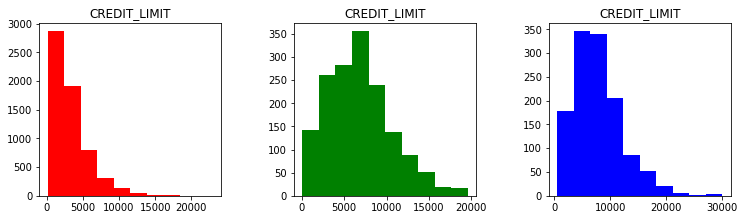

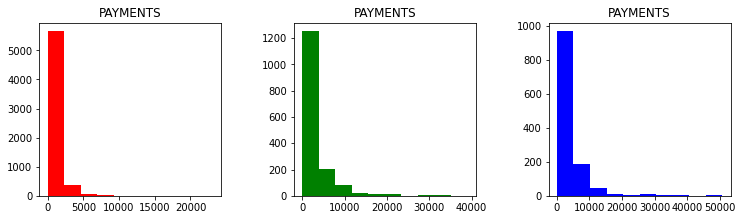

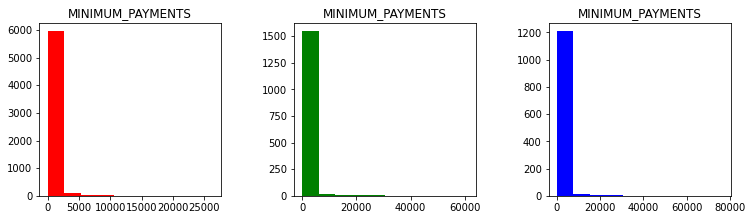

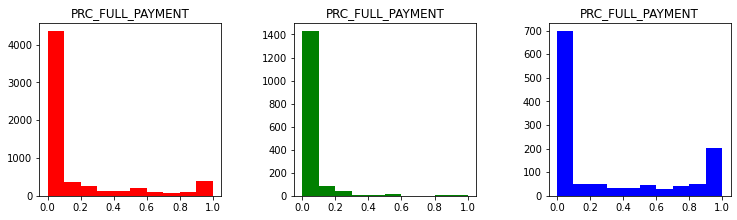

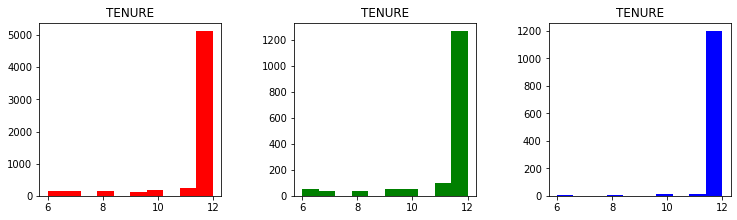

In [376]:
for attr in data.columns[1:-1]:
    fig, ax = plt.subplots(1,3,figsize=(12,3))
    ax[0].hist(c1[attr],color='r')
    ax[1].hist(c2[attr],color='g')
    ax[2].hist(c3[attr],color='b')
    ax[0].set_title(attr)
    ax[1].set_title(attr)
    ax[2].set_title(attr)
    plt.subplots_adjust(left=0.1,
                        bottom=0.1, 
                        right=0.9, 
                        top=0.9, 
                        wspace=0.4, 
                        hspace=0.4)
    
    